In [1]:
!pip install scikit-image


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from typing import Callable
import skimage
from skimage.color import rgb2hsv
from skimage import io, util
import random
import torch
import torch.nn.functional as F

OG dimensions:  (4000, 6000, 3)
reduced dimensions:  (1000, 1500, 3)


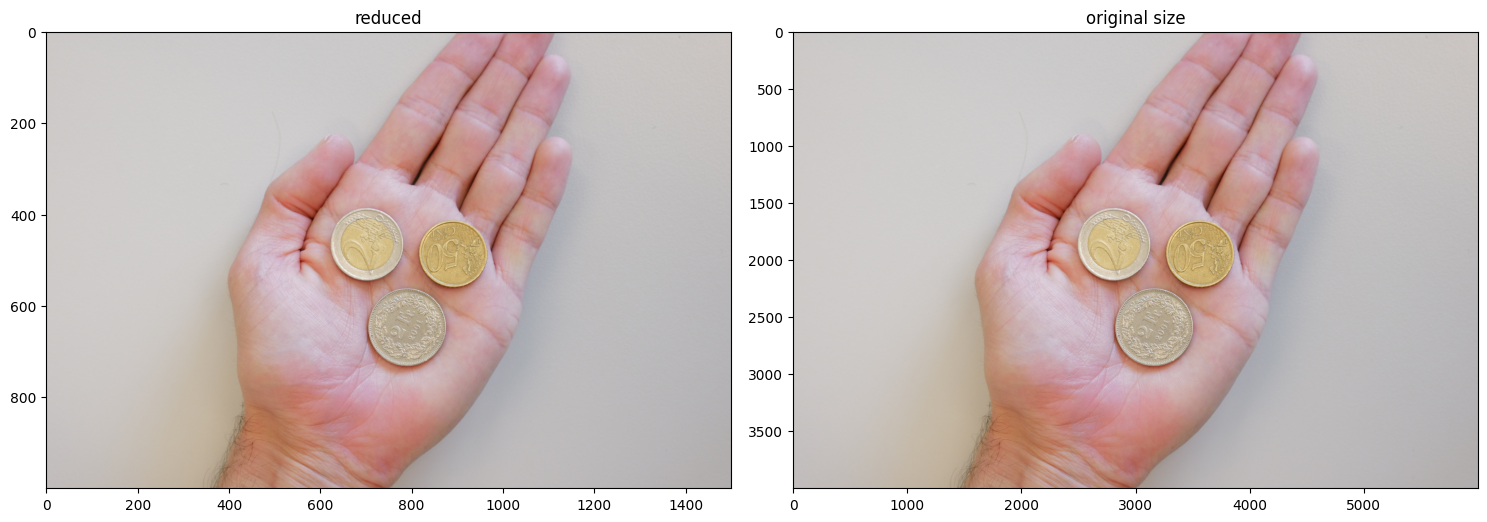

In [3]:
# Define path
path_he = os.path.join("dataset", "train", "hand", "L1010373.JPG")

# Check if folder and image exist
assert os.path.exists(path_he), "Image not found, please check directory structure"

# Load image
image_og= np.array(Image.open(path_he))
scale_percent = 25
width = int(image_og.shape[1] * scale_percent / 100)
height = int(image_og.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image_og, dim, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("reduced")
plt.subplot(1,2,2)
plt.title("original size")
plt.imshow(image_og)

# plt.axis('off')
plt.tight_layout()
print("OG dimensions: ", image_og.shape)
print("reduced dimensions: ", image.shape)


In [4]:
def extract_rgb_channels(img):
    """
    Extract RGB channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_red: np.ndarray (M, N)
        Red channel of input image
    data_green: np.ndarray (M, N)
        Green channel of input image
    data_blue: np.ndarray (M, N)
        Blue channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for RGB channels
    data_red = np.zeros((M, N))
    data_green = np.zeros((M, N))
    data_blue = np.zeros((M, N))

    # ------------------
    data_red = img[:,:,0]
    data_green = img[:,:,1]
    data_blue = img[:,:,2]
    # ------------------
    
    return data_red, data_green, data_blue

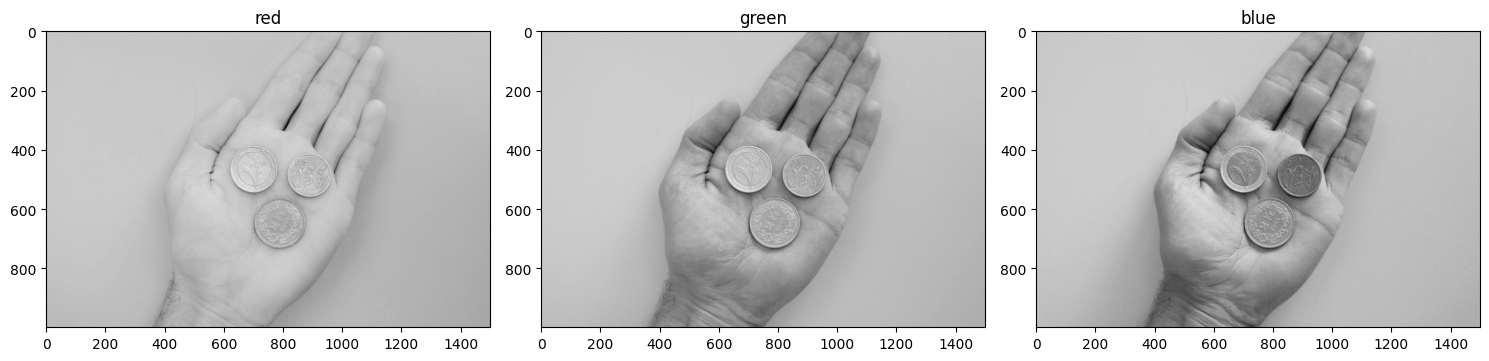

In [5]:
[data_red,data_green,data_blue] = extract_rgb_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_red, cmap='gray')
plt.title('red')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_green, cmap='gray')
plt.title('green')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_blue, cmap='gray')
plt.title('blue')

plt.tight_layout()

In [6]:
def apply_rgb_threshold(img):
    """
    Apply threshold to RGB input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract RGB channels
    # data_red, data_green, data_blue = extract_rgb_channels(img=img)
    
    # ------------------
    thr_red = 180      #   Threshold on red
    thr_green = 150      #   Threshold on green
    thr_blue = 110      #   Threshold on blue
    
    mask_red = img[:,:,0] > thr_red     #   Mask computed on red channel
    mask_green = img[:,:,1] > thr_green     #   Mask computed on red channel
    mask_blue = img[:,:,2] > thr_blue       #   Mask computed on red channel

    # img_th = img_red*img_green*img_blue     #   Combine masks for all channels
    img_th = np.logical_not(mask_red*mask_green*mask_blue)
    # ------------------

    return  img_th

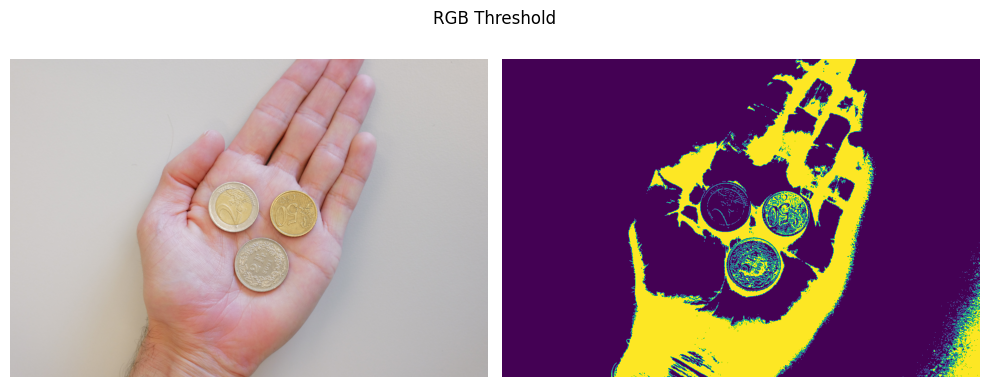

In [7]:
# Plot color space distribution 
def plot_thresholded_image(
    img: np.ndarray,
    func: Callable,
    title: str,
):
    """
    Plot the original image and its thresholded version

    Args
    ----
    img: np.ndarray (M, N, 3)
        Input image of shape MxNx3.
    func: Callable
        Thresholded image.
    title: str
        Title of the plot
    """

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img)
    axes[1].imshow(func(img))
    [a.axis('off') for a in axes]
    plt.suptitle(title)
    plt.tight_layout()
    
# Plot best RGB thresholding
plot_thresholded_image(img=image, func=apply_rgb_threshold, title="RGB Threshold")

In [8]:
def extract_hsv_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------------------
    hsv_img = rgb2hsv(img)
    data_h = hsv_img[:,:,0]
    data_s = hsv_img[:,:,1]
    data_v = hsv_img[:,:,2]
    # ------------------
    
    return data_h, data_s, data_v

Text(0.5, 1.0, 'value')

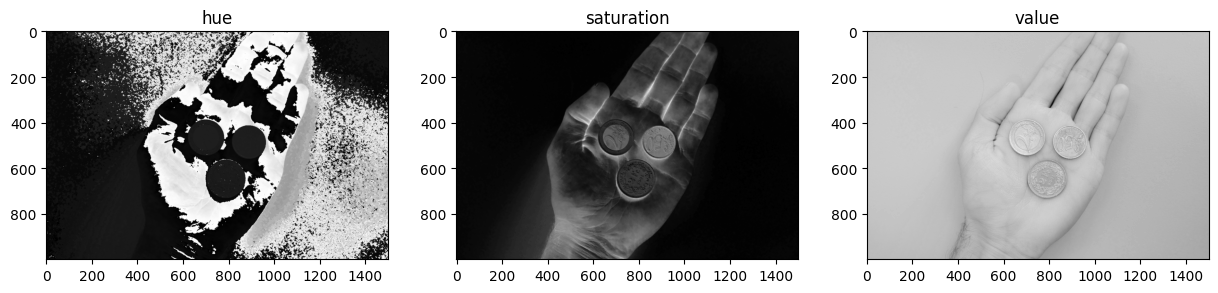

In [9]:
[data_h,data_s,data_v] = extract_hsv_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_h, cmap='gray')
plt.title('hue')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_s, cmap='gray')
plt.title('saturation')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_v, cmap='gray')
plt.title('value')


In [10]:
def extract_LAB_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # ------------------
    LAB_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    L = LAB_img[:,:,0]
    A = LAB_img[:,:,1]
    B = LAB_img[:,:,2]
    # ------------------
    
    return L, A, B

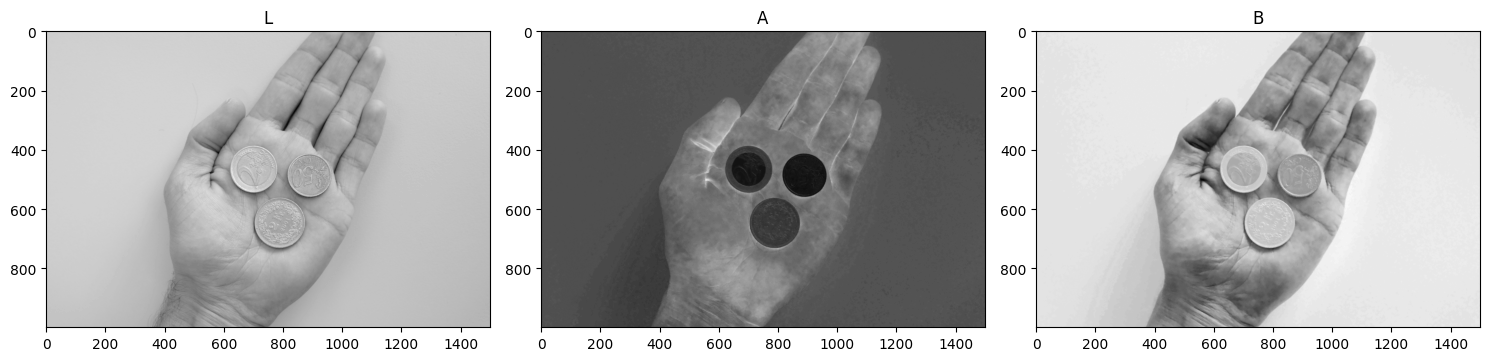

In [11]:
[data_red,data_green,data_blue] = extract_LAB_channels(image)

# Create subplots
plt.figure(figsize=(15, 5))

# Plot the first image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.imshow(data_red, cmap='gray')
plt.title('L')

# Plot the second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.imshow(data_green, cmap='gray')
plt.title('A')

# Plot the third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.imshow(data_blue, cmap='gray')
plt.title('B')

plt.tight_layout()

In [12]:
def apply_LAB_threshold(img):
    """
    Apply threshold to the input image in hsv colorspace.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract HSV channels
        
    # ------------------

    LAB_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    thr_L = 100      #   Threshold on red
    thr_A = 125      #   Threshold on green
    thr_B = 100      #   Threshold on blue
    
    # mask_L = LAB_img[:,:,0] > thr_L     #   Mask computed on red channel
    mask_A = LAB_img[:,:,1] > thr_A     #   Mask computed on red channel
    # mask_B = LAB_img[:,:,2] > thr_B       #   Mask computed on red channel

    # img_th = img_red*img_green*img_blue     #   Combine masks for all channels
    # img_th = (mask_red*mask_green*mask_blue)
    img_th = mask_A
    
    # ------------------
    return  img_th


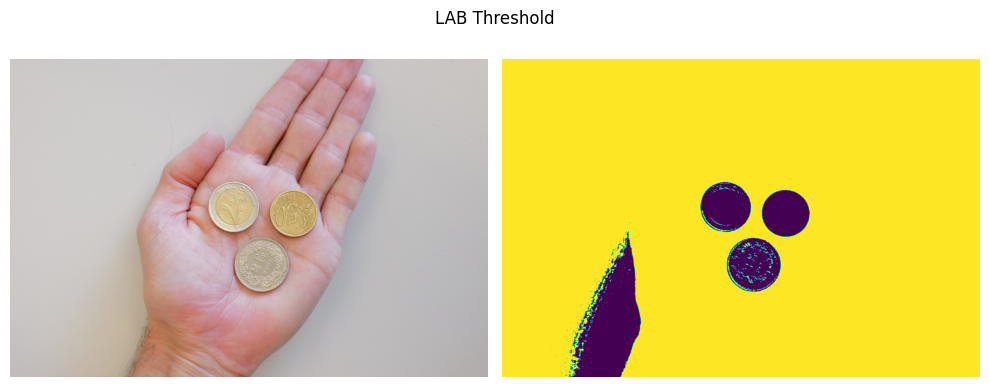

In [13]:
plot_thresholded_image(img=image, func=apply_LAB_threshold, title="LAB Threshold")

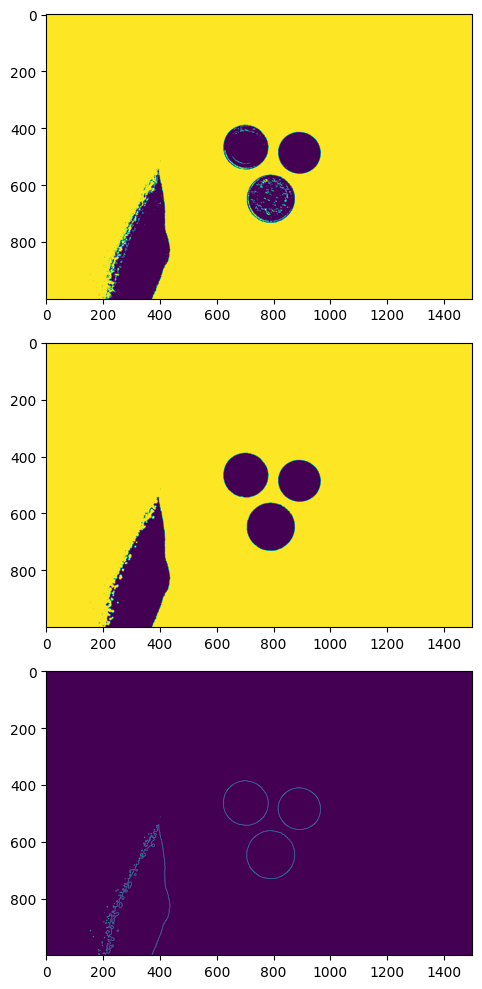

In [14]:
binary = apply_LAB_threshold(img = image)
# blurred = cv2.GaussianBlur(binary, (3,3), 0) 
binary = (binary.astype(np.uint8))*255

cleaned = skimage.morphology.binary_opening(binary, skimage.morphology.disk(3))
cleaned = (cleaned.astype(np.uint8))*255

edged = cv2.Canny(cleaned,210,500)

# Create subplots
fig, axs = plt.subplots(3,1, figsize=(10, 10))  # 2 rows of subplots

# Plot data on each subplot
axs[0].imshow(binary)
axs[1].imshow(cleaned)
axs[2].imshow(edged)

# Add some space between subplots
plt.tight_layout()

circles:  [[786 647  84]
 [702 465  78]
 [890 484  74]]


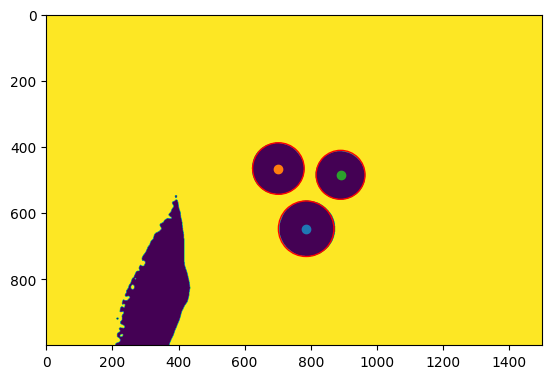

In [15]:
import cv2 as cv
# img = cleaned
img = cv2.medianBlur(cleaned, 11)

# img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT_ALT,1,10,
 param1=100,param2=0.3,minRadius=50,maxRadius=200)
circles = circles[0]

fig, ax = plt.subplots()

ax.imshow(img)

circles = np.uint16(np.around(circles))
print("circles: ", circles)

for i in circles:
    # draw the outer circle
    plt.scatter(i[0],i[1])
    # draw the center of the circle
    circle_obj = plt.Circle((i[0], i[1]), radius=i[2] , fill=False, color='r')
    ax.add_patch(circle_obj)

# cv.imshow('detected circles',cimg)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [16]:

# def crop_image_into_patches(image, patch_width, patch_height):
#     height, width = image.shape[:2]
#     patches = []

#     for y in range(0, height, patch_height):
#         for x in range(0, width, patch_width):
#             patch = image[y:y+patch_height, x:x+patch_width]
#             patches.append(patch)

#     return patches

def crop_image_into_patches(image, circles):
    patches = []
    for i in range(len(circles)):
        current_circle = circles[i]
        current_x = current_circle[0]
        current_y = current_circle[1]
        current_r = current_circle[2]

        # cropped = image[(current_x - current_r) : (current_x + current_r) , (current_y - current_r) : (current_y + current_r) ]

        # Calculate bounding box coordinates for cropping
        top_left_x = max(0, current_x - current_r)
        top_left_y = max(0, current_y - current_r)
        bottom_right_x = min(image.shape[1], current_x + current_r)
        bottom_right_y = min(image.shape[0], current_y + current_r)

        # Crop circular region
        cropped = image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
        patches.append(cropped)
    return patches


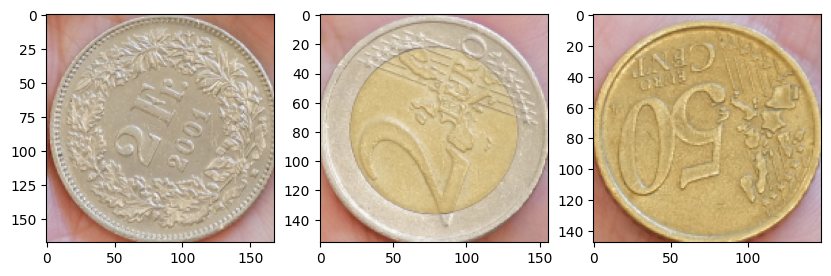

In [17]:
patches = crop_image_into_patches(image , circles)
number_coins = len(patches)

fig, axs = plt.subplots(1, number_coins, figsize=(10, 10))  # 2 rows of subplots

for i in range(number_coins):
    axs[i].imshow(patches[i])

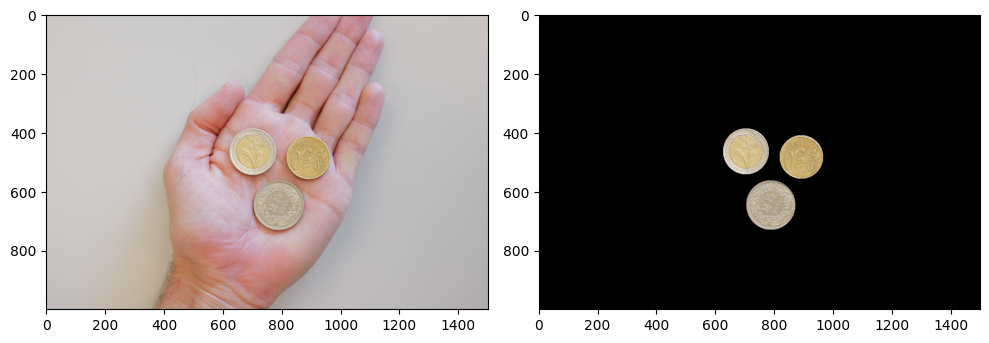

In [18]:
first_circle = circles[0]
mask = np.zeros(image.shape[:2], dtype=np.uint8)
for i in range(len(circles)):
    current_circle = circles[i]
    rr, cc = skimage.draw.disk(current_circle[0:2][::-1], current_circle[2], shape=image.shape[:2])
    mask[rr, cc] = 1

mask_3d = np.stack([mask] * 3, axis=-1)
masked_image = mask_3d * image

fig,axes = plt.subplots(1,2,figsize = (10,5))
axes[0].imshow(image)
axes[1].imshow(masked_image)
plt.tight_layout()

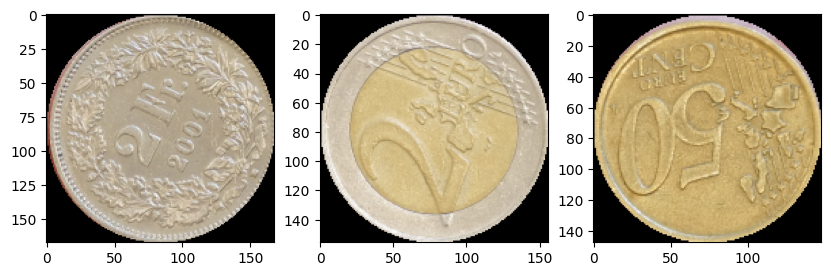

In [19]:
patches = crop_image_into_patches(masked_image , circles)
number_coins = len(patches)

fig, axs = plt.subplots(1, number_coins, figsize=(10, 10))  # 2 rows of subplots

for i in range(number_coins):
    axs[i].imshow(patches[i])

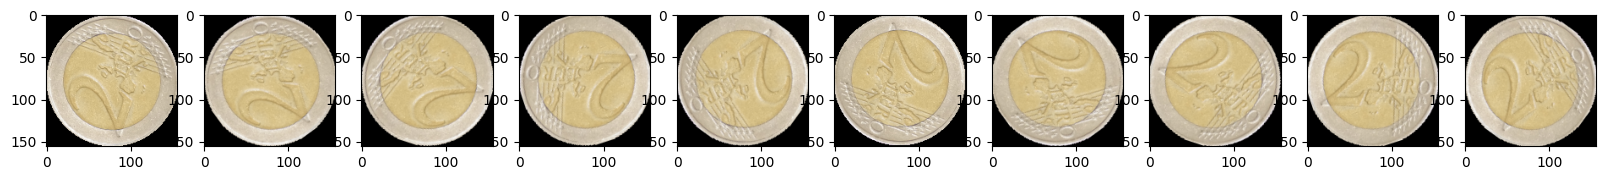

In [20]:
cropped_sampled = patches[1]
fig, axes = plt.subplots(1, 10, figsize = (20,10))
for i in range(10):
    rotated = skimage.transform.rotate(cropped_sampled, i*36)
    axes[i].imshow(rotated)

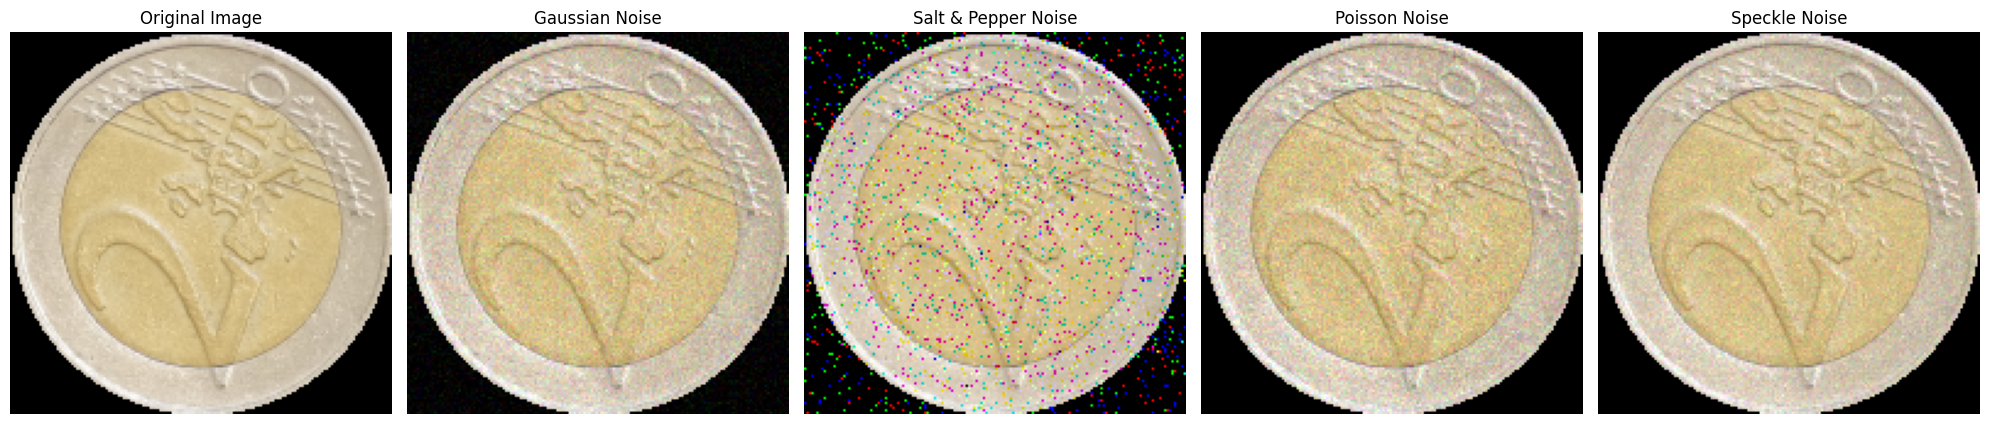

In [21]:
# Add Gaussian noise
noisy_image_gaussian = util.random_noise(cropped_sampled, mode='gaussian', var = 0.002)

# Add salt & pepper noise
noisy_image_salt_pepper = util.random_noise(cropped_sampled, mode='s&p', amount = 0.05)

# Add Poisson noise
noisy_image_poisson = util.random_noise(cropped_sampled, mode='poisson')

# Add Speckle noise
noisy_image_speckle = util.random_noise(cropped_sampled, mode='speckle', var = 0.0025)

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(cropped_sampled)
ax[0].set_title('Original Image')

ax[1].imshow(noisy_image_gaussian)
ax[1].set_title('Gaussian Noise')

ax[2].imshow(noisy_image_salt_pepper)
ax[2].set_title('Salt & Pepper Noise')

ax[3].imshow(noisy_image_poisson)
ax[3].set_title('Poisson Noise')

ax[4].imshow(noisy_image_speckle)
ax[4].set_title('Speckle Noise')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [22]:
def apply_noise(image):
    if random.uniform(0,1) > 0.4:                                   # 60% chance to apply a filter, else return the image itself
        filter_decider = random.uniform(0,1)
        if filter_decider > 0.5:                                    # 50 % chance of applying a guassian noise
            var = random.uniform(np.log10(0.0005),np.log10(0.002))
            var = 10**(var)
            print("var: ", var)
            image = util.random_noise(image, mode='gaussian', var = var)
        elif filter_decider > 0.4:                                 # 10% chance of applying poisson noise
            image =  util.random_noise(image, mode='poisson')
        else:   
            var = random.uniform(0.001 , 0.0025)                            # 40% chance of applying speckle noise
            image = util.random_noise(image, mode='speckle', var = var)

    return image

var:  0.0006448421980321529
var:  0.0005285793741864702


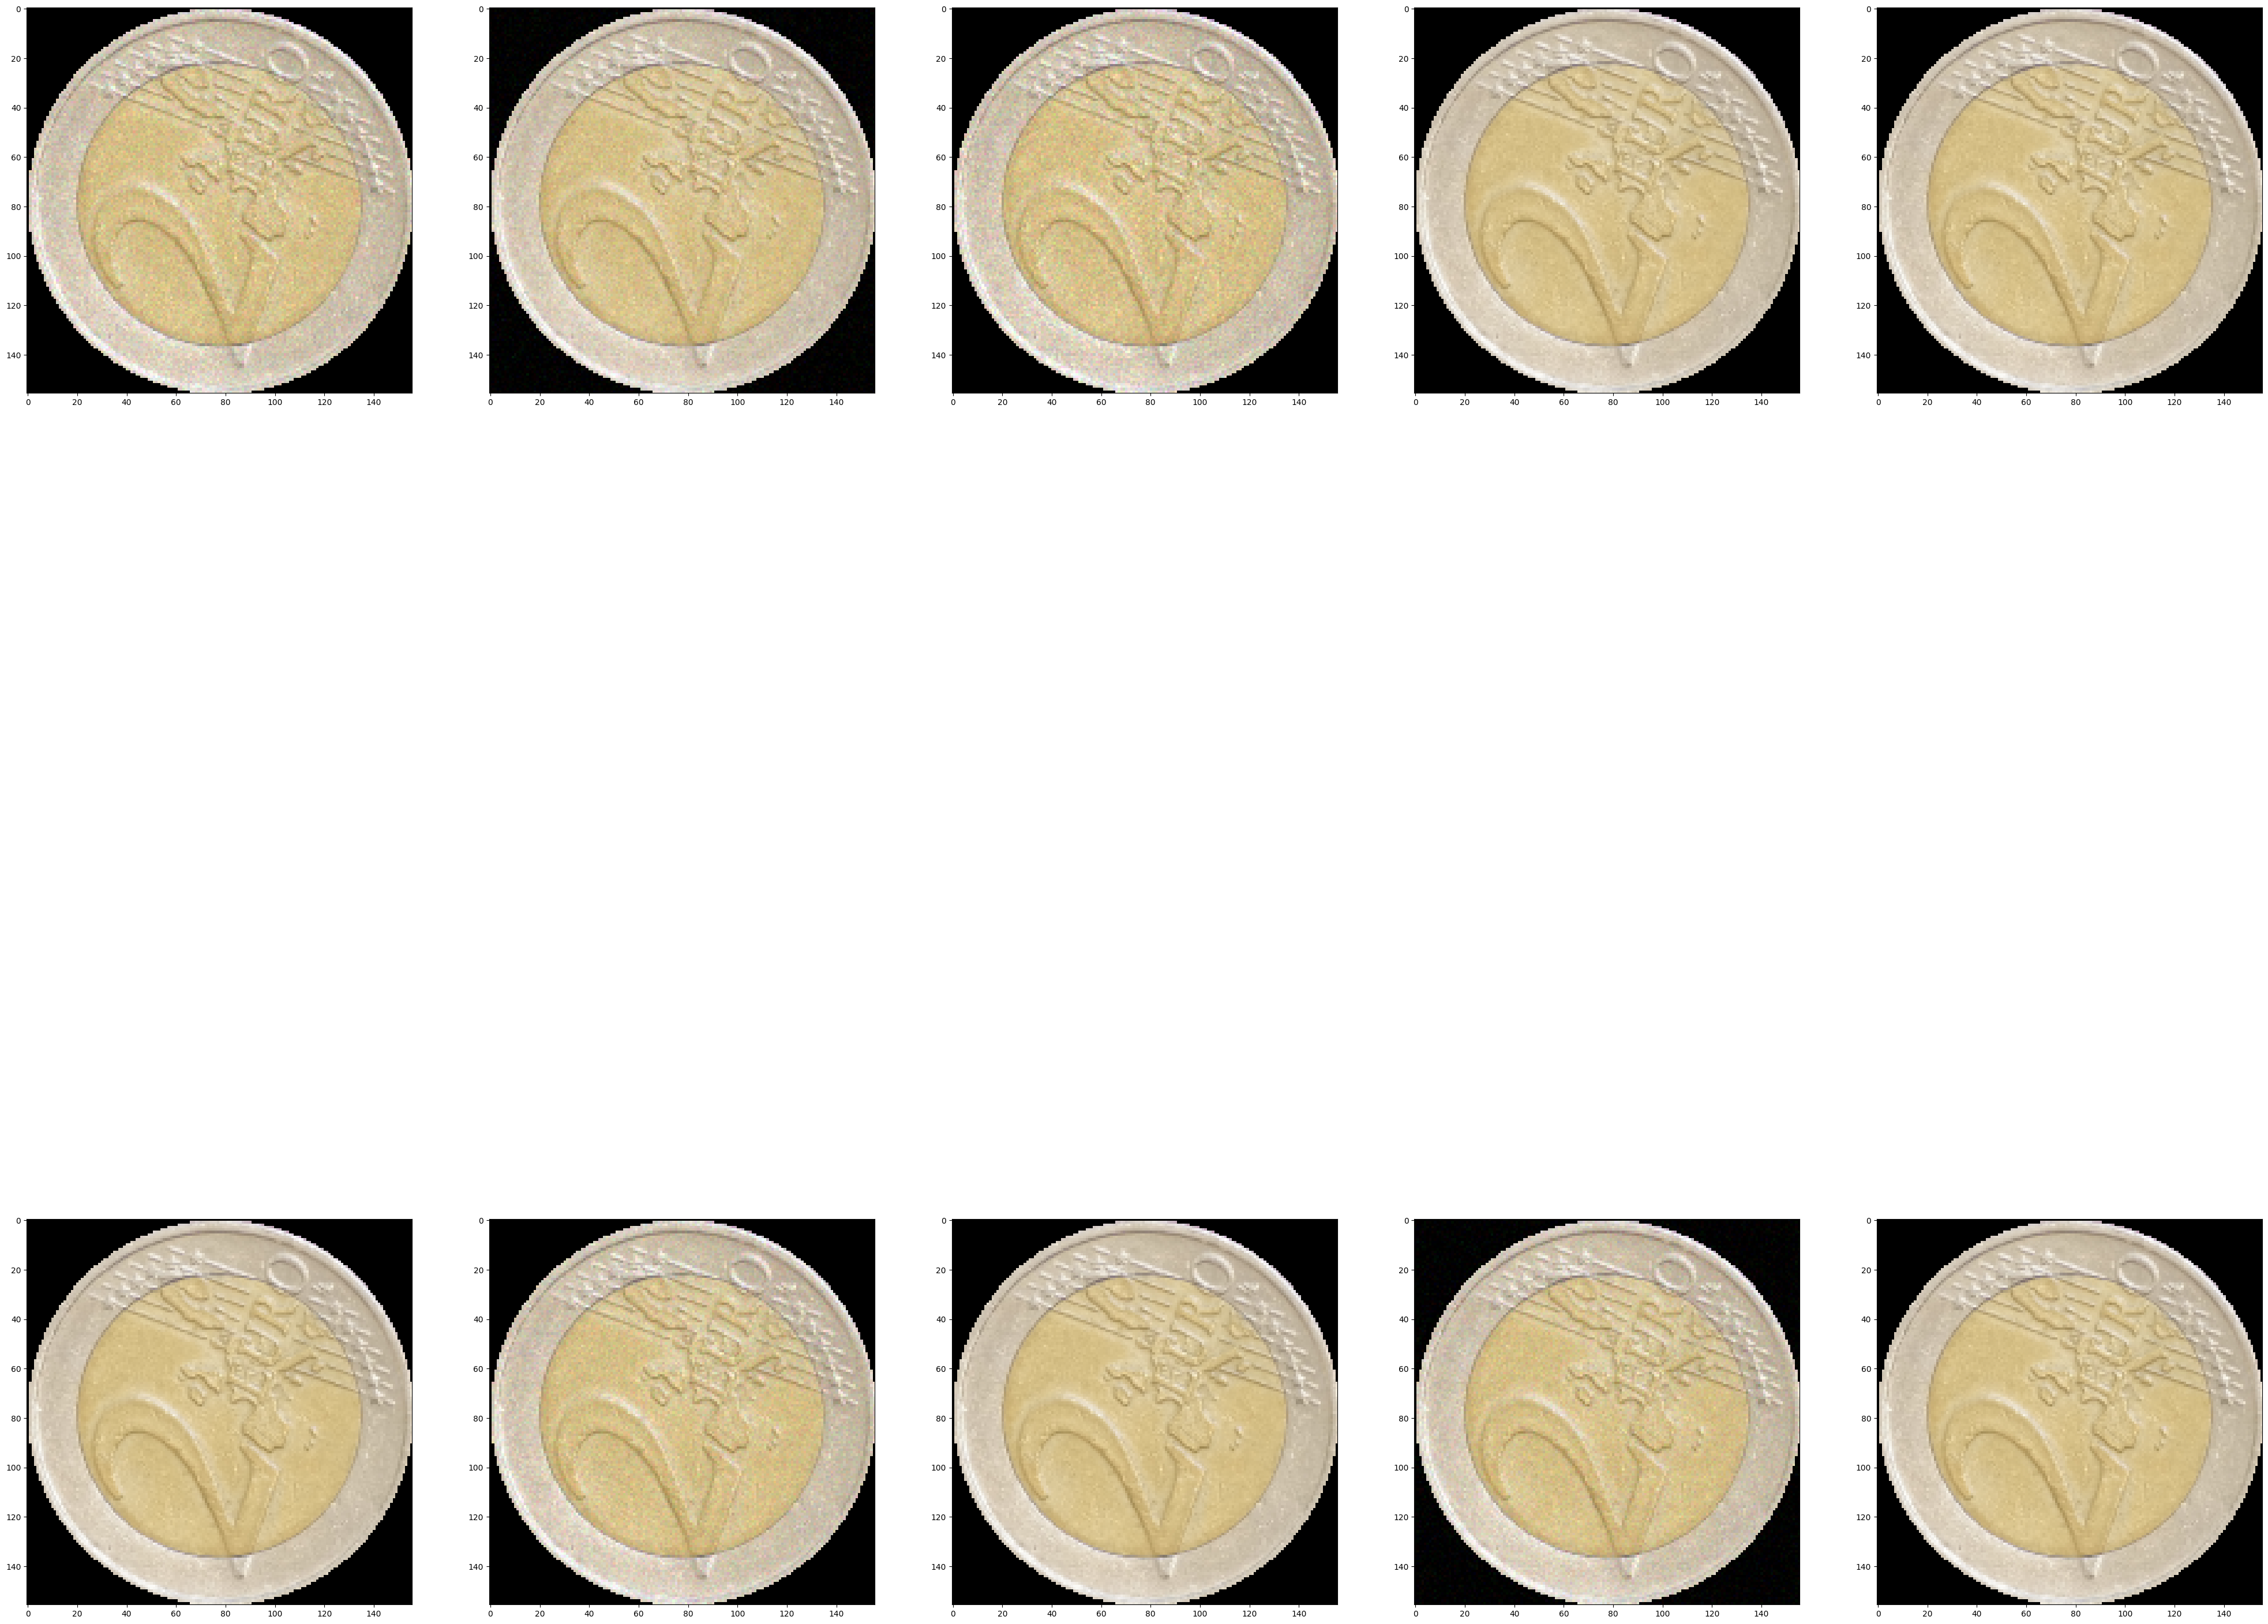

In [23]:
import matplotlib.pyplot as plt

# Assuming apply_noise and cropped_sampled are defined elsewhere
plots = 10
fig, axes = plt.subplots(2, 5, figsize=(50, 50))

for i in range(plots):
    row = i // 5  # Row index
    col = i % 5   # Column index
    axes[row, col].imshow(apply_noise(cropped_sampled))
plt.show()


In [24]:
def apply_rotation(image):
    angle = random.uniform(0,360)
    print("angle: ", angle)
    image = skimage.transform.rotate(image, angle)
    return image

angle:  114.36330579161388
angle:  125.1137035212697
angle:  173.25906539071312
angle:  252.3682033379543
angle:  137.46255716805152


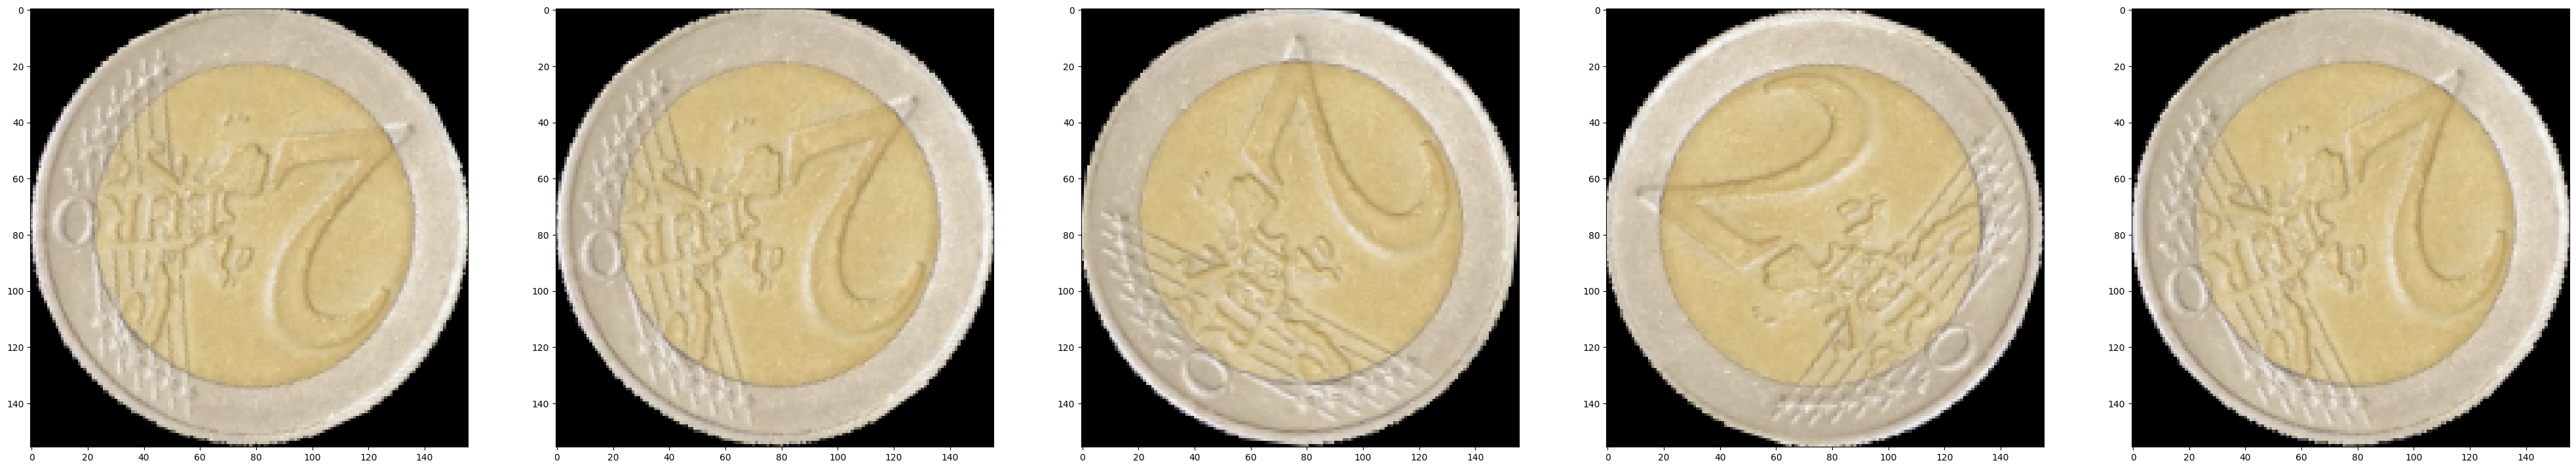

In [25]:
import matplotlib.pyplot as plt

# Assuming apply_noise and cropped_sampled are defined elsewhere
plots = 5
fig, axes = plt.subplots(1, 5, figsize=(50, 50))

for i in range(plots):
    axes[i].imshow(apply_rotation(cropped_sampled))
plt.show()


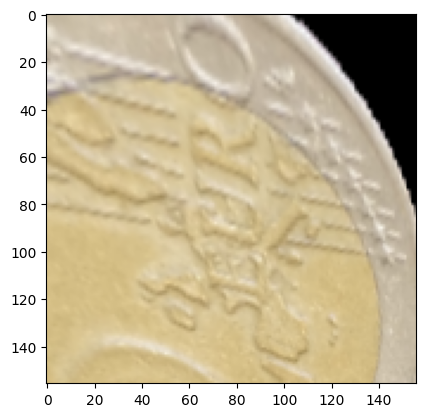

In [26]:
import cv2
import numpy as np

# Load the image
image = cropped_sampled
# Define the coordinates of the four corners of the original image
pts1 = np.float32([[50,50], [200,50], [50,200], [200,200]])

# Define the coordinates of the four corners of the desired output
pts2 = np.float32([[10,100], [200,50], [100,250], [200,200]])

# Compute the perspective transformation matrix
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Apply the perspective transformation to the image
result = cv2.warpPerspective(image, matrix, (image.shape[1], image.shape[0]))

# Display the original and warped images
plt.imshow(image)
plt.imshow(result)


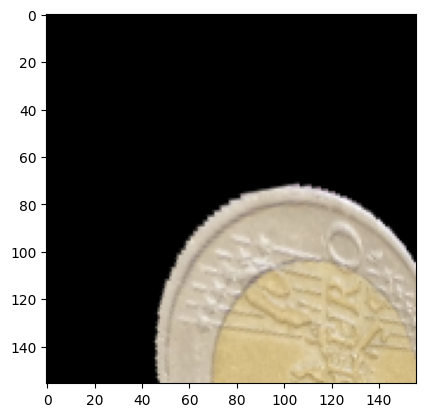

In [27]:
def apply_warp(image):                                                                  ### NOT COMPLETED ###
    # Define the coordinates of the four corners of the original image
    pts1 = np.float32([[0,0], [200,0], [0,200], [200,200]])

    # Define the coordinates of the four corners of the desired output
    pts2 = np.float32([[10,100], [200,50], [100,250], [200,200]])

    # Compute the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Define maximum deviation for each point
    max_deviation = 10

    # Generate random small deviations for each point
    deviations = np.random.randint(-max_deviation, max_deviation+1, pts1.shape).astype(np.float32)

    # Apply the deviations to the original points
    warped_pts2 = pts2 + deviations

    # Compute the perspective transformation matrix with deviations
    warped_matrix = cv2.getPerspectiveTransform(pts1, warped_pts2)

    # Apply the perspective transformation with deviations to the image
    warped_image = cv2.warpPerspective(image, warped_matrix, (image.shape[1], image.shape[0]))

    return warped_image

warped_image = apply_warp(cropped_sampled)
# Display the original and warped images
plt.imshow(cropped_sampled)
plt.imshow(warped_image)

True

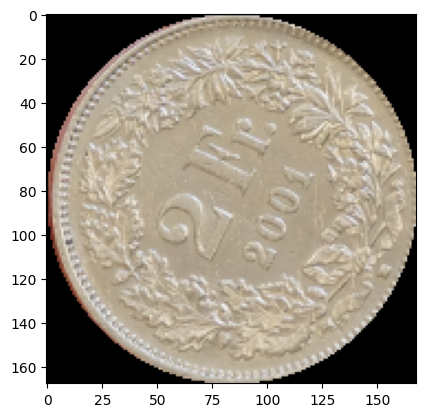

In [56]:
plt.imshow(patches[0])

# Convert the image matrix to uint8 data type (required by OpenCV)
image_matrix = np.uint8(patches[2])

# Save the image
cv2.imwrite('cropped_2.jpg', cv2.cvtColor(image_matrix, cv2.COLOR_RGB2BGR))    

True

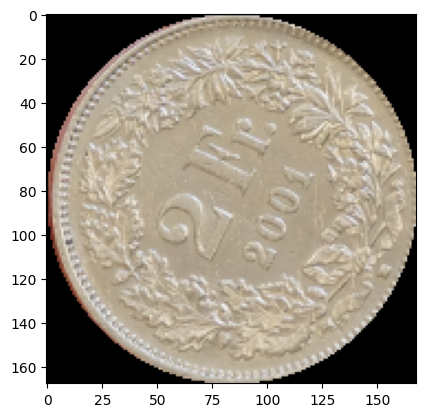

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'patches' is your image data
plt.imshow(patches[0])

# Convert the image matrix to uint8 data type (required by OpenCV)
image_matrix = np.uint8(patches[0])

# Normalize the image data to [0, 255]
normalized_image = cv2.normalize(image_matrix, None, 0, 255, cv2.NORM_MINMAX)

# Save the image
cv2.imwrite('cropped_1.jpg', normalized_image)
